My solutions to the exercises in Chapter Two of the Book, Hands-on Machine Learning with Sklearn and Tensorflow.

In [40]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

In [4]:
file_path = "datasets/housing"
data_path = os.path.join(file_path, "housing.csv")

In [5]:
# Read the data
data = pd.read_csv(data_path)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.shape

(20640, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<em>Creating the test set.</em>

In [9]:
data["income_cat"] = pd.cut(data["median_income"],
                           bins=[0., 1.5, 3.0, 4.5, 6, np.inf],
                           labels=[1, 2, 3, 4, 5])

In [10]:
data.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
income_cat            category
dtype: object

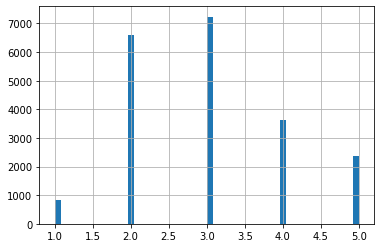

In [11]:
data["income_cat"].hist(bins=50)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_cat"]):
    train = data.loc[train_index]
    test = data.loc[test_index]

In [13]:
test["income_cat"].value_counts()/len(test)
# Variability test

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [14]:
# Removing the extra column.
for col in (train, test):
    col.drop("income_cat", axis=1, inplace=True)

Data Visualization and Discovery

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 10 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4079 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


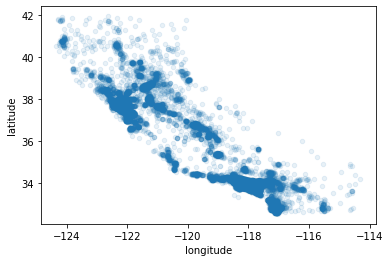

In [17]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

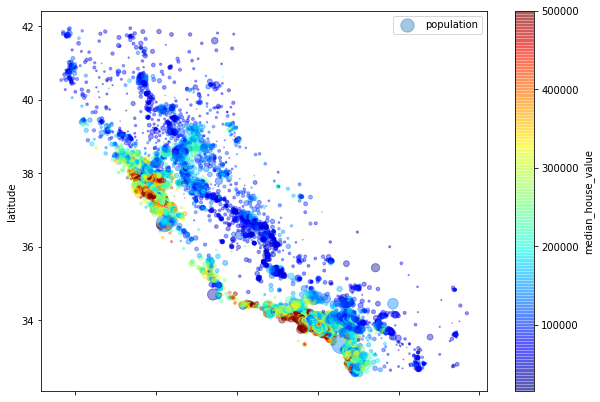

In [18]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
         s=data["population"]/100, label="population", figsize=(10,7),
         c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
income_cat            20640 non-null category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [21]:
# Seperating the predictors from the labels.
X_train = train.drop("median_house_value", axis=1)
y_train = train["median_house_value"].copy()

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_trans = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs', CombinedAttributesAdder()),
    ('scaler', StandardScaler()),
])

In [24]:
# Split categoricals and numericals
X_train, y_train

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 17606    -121.89     37.29                38.0       1568.0           351.0   
 18632    -121.93     37.05                14.0        679.0           108.0   
 14650    -117.20     32.77                31.0       1952.0           471.0   
 3230     -119.61     36.31                25.0       1847.0           371.0   
 3555     -118.59     34.23                17.0       6592.0          1525.0   
 ...          ...       ...                 ...          ...             ...   
 6563     -118.13     34.20                46.0       1271.0           236.0   
 12053    -117.56     33.88                40.0       1196.0           294.0   
 13908    -116.40     34.09                 9.0       4855.0           872.0   
 11159    -118.01     33.82                31.0       1960.0           380.0   
 15775    -122.45     37.77                52.0       3095.0           682.0   
 
        population  households  median

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [26]:
X_train_num = X_train.drop("ocean_proximity", axis=1)
X_train_cat = X_train[["ocean_proximity"]]

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(X_train_num)
cat_attribs = ["ocean_proximity"]

transformer = ColumnTransformer([
    ("num", num_trans, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

In [28]:
X_train_trans = transformer.fit_transform(X_train)

In [29]:
X_train_trans.shape

(16512, 16)

Training and selection of Model

1: Try a Support Vector Machine regressor ( sklearn.svm.SVR ), with various hyperparameters such as 
kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values 
for the C and gamma hyperparameters). Don’t worry about what these hyperparameters mean for now.
How does the best SVR predictor perform?

In [36]:
from sklearn.svm import SVR
linSVR = SVR(kernel="linear", C=10, epsilon=0.1)
linSVR.fit(X_train_trans, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
rbfSVR = SVR(kernel="rbf", gamma=0.1, C=10, epsilon=0.1)
rbfSVR.fit(X_train_trans, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
polySVR = SVR(kernel="poly", gamma="scale", C=10, degree=2, epsilon=0.1)
polySVR.fit(X_train_trans, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
# Predict on the test set
#X_test, y_test = test.drop("median_income_value", axis=1), test["median_house_value"].copy()

In [40]:
linSVR.predict(X_train_trans)

array([175445.59386078, 255142.51331222, 168103.97230703, ...,
       134564.72586069, 201309.2427234 , 206985.76108899])

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
predictions = [linSVR.predict(X_train_trans), rbfSVR.predict(X_train_trans), polySVR.predict(X_train_trans)]

In [51]:
predictions

[array([175445.59386078, 255142.51331222, 168103.97230703, ...,
        134564.72586069, 201309.2427234 , 206985.76108899]),
 array([176378.08593448, 184368.97143646, 176502.59556455, ...,
        177629.08758472, 182163.93032227, 181032.03358087]),
 array([178290.60478294, 181493.45579067, 178225.27854142, ...,
        179012.54046196, 179106.50297471, 179744.86233886])]

In [52]:
mean_squared_errors = []

for array in predictions:
    error = mean_squared_error(y_train, array)
    mean_squared_errors.append(np.sqrt(error))

In [53]:
mean_squared_errors # Terrible

[81933.17308297305, 115511.94261249984, 117375.4004419501]

In [54]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train_trans, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
LR_preds = LR.predict(X_train_trans)

In [56]:
error = np.sqrt(mean_squared_error(y_train, LR_preds))
error

68628.19819848923

In [57]:
predictions

[array([175445.59386078, 255142.51331222, 168103.97230703, ...,
        134564.72586069, 201309.2427234 , 206985.76108899]),
 array([176378.08593448, 184368.97143646, 176502.59556455, ...,
        177629.08758472, 182163.93032227, 181032.03358087]),
 array([178290.60478294, 181493.45579067, 178225.27854142, ...,
        179012.54046196, 179106.50297471, 179744.86233886])]

In [58]:
mean_squared_errors

[81933.17308297305, 115511.94261249984, 117375.4004419501]

#### Best SVR predictor: sklearn.svm.SVR(kernel="linear")

2: Try replacing GridSearchCV with RandomizedSearchCV.

In [59]:
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from scipy.stats import expon, reciprocal

In [60]:
parameters = {'kernel': ['linear', 'rbf'],
              'gamma' : shuffle([.1, 1, 4, 9, 11, 15, 20, 35, 50, 75, 100, 150, 200, 300, 500]),
              'C'     : shuffle([10, 20, 40, 60, 70, 100, 200, 500, 700, 1000, 1100, 1200, 1400, 1600, 2000]),
             }

In [61]:
svr = SVR()
GSCV = GridSearchCV(svr, param_grid=parameters, cv=10, 
                    scoring='neg_mean_squared_error',return_train_score=True,
                   verbose=2)

In [ ]:
GSCV.fit(X_train_trans, y_train)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits
[CV] C=1100, gamma=0.1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. C=1100, gamma=0.1, kernel=linear, total=   7.8s
[CV] C=1100, gamma=0.1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s remaining:    0.0s


[CV] ................. C=1100, gamma=0.1, kernel=linear, total=   7.8s
[CV] C=1100, gamma=0.1, kernel=linear ................................
[CV] ................. C=1100, gamma=0.1, kernel=linear, total=   8.3s
[CV] C=1100, gamma=0.1, kernel=linear ................................
[CV] ................. C=1100, gamma=0.1, kernel=linear, total=   9.3s
[CV] C=1100, gamma=0.1, kernel=linear ................................
[CV] ................. C=1100, gamma=0.1, kernel=linear, total=   9.2s
[CV] C=1100, gamma=0.1, kernel=linear ................................
[CV] ................. C=1100, gamma=0.1, kernel=linear, total=   8.1s
[CV] C=1100, gamma=0.1, kernel=linear ................................
[CV] ................. C=1100, gamma=0.1, kernel=linear, total=   8.1s
[CV] C=1100, gamma=0.1, kernel=linear ................................
[CV] ................. C=1100, gamma=0.1, kernel=linear, total=   8.0s
[CV] C=1100, gamma=0.1, kernel=linear ................................
[CV] .

[CV] ..................... C=1100, gamma=15, kernel=rbf, total=  14.4s
[CV] C=1100, gamma=9, kernel=linear ..................................
[CV] ................... C=1100, gamma=9, kernel=linear, total=   7.8s
[CV] C=1100, gamma=9, kernel=linear ..................................
[CV] ................... C=1100, gamma=9, kernel=linear, total=   7.9s
[CV] C=1100, gamma=9, kernel=linear ..................................
[CV] ................... C=1100, gamma=9, kernel=linear, total=   7.7s
[CV] C=1100, gamma=9, kernel=linear ..................................
[CV] ................... C=1100, gamma=9, kernel=linear, total=   7.8s
[CV] C=1100, gamma=9, kernel=linear ..................................
[CV] ................... C=1100, gamma=9, kernel=linear, total=   7.7s
[CV] C=1100, gamma=9, kernel=linear ..................................
[CV] ................... C=1100, gamma=9, kernel=linear, total=   7.7s
[CV] C=1100, gamma=9, kernel=linear ..................................
[CV] .

[CV] .................... C=1100, gamma=200, kernel=rbf, total=  12.2s
[CV] C=1100, gamma=200, kernel=rbf ...................................
[CV] .................... C=1100, gamma=200, kernel=rbf, total=  12.0s
[CV] C=1100, gamma=200, kernel=rbf ...................................
[CV] .................... C=1100, gamma=200, kernel=rbf, total=  11.8s
[CV] C=1100, gamma=50, kernel=linear .................................
[CV] .................. C=1100, gamma=50, kernel=linear, total=   9.2s
[CV] C=1100, gamma=50, kernel=linear .................................
[CV] .................. C=1100, gamma=50, kernel=linear, total=   7.9s
[CV] C=1100, gamma=50, kernel=linear .................................
[CV] .................. C=1100, gamma=50, kernel=linear, total=   7.8s
[CV] C=1100, gamma=50, kernel=linear .................................
[CV] .................. C=1100, gamma=50, kernel=linear, total=   7.8s
[CV] C=1100, gamma=50, kernel=linear .................................
[CV] .

[CV] ...................... C=1100, gamma=4, kernel=rbf, total=  15.1s
[CV] C=1100, gamma=4, kernel=rbf .....................................
[CV] ...................... C=1100, gamma=4, kernel=rbf, total=  15.0s
[CV] C=1100, gamma=4, kernel=rbf .....................................
[CV] ...................... C=1100, gamma=4, kernel=rbf, total=  15.2s
[CV] C=1100, gamma=4, kernel=rbf .....................................
[CV] ...................... C=1100, gamma=4, kernel=rbf, total=  16.7s
[CV] C=1100, gamma=4, kernel=rbf .....................................
[CV] ...................... C=1100, gamma=4, kernel=rbf, total=  16.1s
[CV] C=1100, gamma=75, kernel=linear .................................
[CV] .................. C=1100, gamma=75, kernel=linear, total=   7.8s
[CV] C=1100, gamma=75, kernel=linear .................................
[CV] .................. C=1100, gamma=75, kernel=linear, total=   7.8s
[CV] C=1100, gamma=75, kernel=linear .................................
[CV] .

[CV] ..................... C=1100, gamma=11, kernel=rbf, total=  17.8s
[CV] C=1100, gamma=11, kernel=rbf ....................................
[CV] ..................... C=1100, gamma=11, kernel=rbf, total=  19.4s
[CV] C=1100, gamma=11, kernel=rbf ....................................
[CV] ..................... C=1100, gamma=11, kernel=rbf, total=  18.4s
[CV] C=1100, gamma=11, kernel=rbf ....................................
[CV] ..................... C=1100, gamma=11, kernel=rbf, total=  18.9s
[CV] C=1100, gamma=11, kernel=rbf ....................................
[CV] ..................... C=1100, gamma=11, kernel=rbf, total=  18.9s
[CV] C=1100, gamma=11, kernel=rbf ....................................
[CV] ..................... C=1100, gamma=11, kernel=rbf, total=  20.4s
[CV] C=1100, gamma=11, kernel=rbf ....................................
[CV] ..................... C=1100, gamma=11, kernel=rbf, total=  21.0s
[CV] C=1100, gamma=35, kernel=linear .................................
[CV] .

[CV] .................... C=1100, gamma=500, kernel=rbf, total=  10.6s
[CV] C=1100, gamma=500, kernel=rbf ...................................
[CV] .................... C=1100, gamma=500, kernel=rbf, total=  10.5s
[CV] C=1100, gamma=500, kernel=rbf ...................................
[CV] .................... C=1100, gamma=500, kernel=rbf, total=  10.4s
[CV] C=1100, gamma=500, kernel=rbf ...................................
[CV] .................... C=1100, gamma=500, kernel=rbf, total=  10.5s
[CV] C=1100, gamma=500, kernel=rbf ...................................
[CV] .................... C=1100, gamma=500, kernel=rbf, total=  10.6s
[CV] C=1100, gamma=500, kernel=rbf ...................................
[CV] .................... C=1100, gamma=500, kernel=rbf, total=  10.9s
[CV] C=1100, gamma=500, kernel=rbf ...................................
[CV] .................... C=1100, gamma=500, kernel=rbf, total=  11.4s
[CV] C=1100, gamma=500, kernel=rbf ...................................
[CV] .

[CV] .................... C=40, gamma=15, kernel=linear, total=   8.4s
[CV] C=40, gamma=15, kernel=rbf ......................................
[CV] ....................... C=40, gamma=15, kernel=rbf, total=  15.9s
[CV] C=40, gamma=15, kernel=rbf ......................................
[CV] ....................... C=40, gamma=15, kernel=rbf, total=  15.3s
[CV] C=40, gamma=15, kernel=rbf ......................................
[CV] ....................... C=40, gamma=15, kernel=rbf, total=  15.5s
[CV] C=40, gamma=15, kernel=rbf ......................................
[CV] ....................... C=40, gamma=15, kernel=rbf, total=  15.4s
[CV] C=40, gamma=15, kernel=rbf ......................................
[CV] ....................... C=40, gamma=15, kernel=rbf, total=  15.1s
[CV] C=40, gamma=15, kernel=rbf ......................................
[CV] ....................... C=40, gamma=15, kernel=rbf, total=  15.1s
[CV] C=40, gamma=15, kernel=rbf ......................................
[CV] .

[CV] ................... C=40, gamma=200, kernel=linear, total=   8.5s
[CV] C=40, gamma=200, kernel=linear ..................................
[CV] ................... C=40, gamma=200, kernel=linear, total=   8.4s
[CV] C=40, gamma=200, kernel=linear ..................................
[CV] ................... C=40, gamma=200, kernel=linear, total=   8.4s
[CV] C=40, gamma=200, kernel=rbf .....................................
[CV] ...................... C=40, gamma=200, kernel=rbf, total=  11.9s
[CV] C=40, gamma=200, kernel=rbf .....................................
[CV] ...................... C=40, gamma=200, kernel=rbf, total=  11.8s
[CV] C=40, gamma=200, kernel=rbf .....................................
[CV] ...................... C=40, gamma=200, kernel=rbf, total=  11.9s
[CV] C=40, gamma=200, kernel=rbf .....................................
[CV] ...................... C=40, gamma=200, kernel=rbf, total=  11.8s
[CV] C=40, gamma=200, kernel=rbf .....................................
[CV] .

[CV] ..................... C=40, gamma=4, kernel=linear, total=   8.1s
[CV] C=40, gamma=4, kernel=linear ....................................
[CV] ..................... C=40, gamma=4, kernel=linear, total=   8.3s
[CV] C=40, gamma=4, kernel=linear ....................................
[CV] ..................... C=40, gamma=4, kernel=linear, total=   8.8s
[CV] C=40, gamma=4, kernel=linear ....................................
[CV] ..................... C=40, gamma=4, kernel=linear, total=   8.4s
[CV] C=40, gamma=4, kernel=linear ....................................
[CV] ..................... C=40, gamma=4, kernel=linear, total=   8.8s
[CV] C=40, gamma=4, kernel=rbf .......................................
[CV] ........................ C=40, gamma=4, kernel=rbf, total=  16.5s
[CV] C=40, gamma=4, kernel=rbf .......................................
[CV] ........................ C=40, gamma=4, kernel=rbf, total=  17.1s
[CV] C=40, gamma=4, kernel=rbf .......................................
[CV] .

[CV] .................... C=40, gamma=11, kernel=linear, total=   8.4s
[CV] C=40, gamma=11, kernel=linear ...................................
[CV] .................... C=40, gamma=11, kernel=linear, total=   8.1s
[CV] C=40, gamma=11, kernel=linear ...................................
[CV] .................... C=40, gamma=11, kernel=linear, total=  10.1s
[CV] C=40, gamma=11, kernel=linear ...................................
[CV] .................... C=40, gamma=11, kernel=linear, total=   8.3s
[CV] C=40, gamma=11, kernel=linear ...................................
[CV] .................... C=40, gamma=11, kernel=linear, total=   9.1s
[CV] C=40, gamma=11, kernel=linear ...................................
[CV] .................... C=40, gamma=11, kernel=linear, total=   8.0s
[CV] C=40, gamma=11, kernel=linear ...................................
[CV] .................... C=40, gamma=11, kernel=linear, total=   8.4s
[CV] C=40, gamma=11, kernel=rbf ......................................
[CV] .

[CV] ................... C=40, gamma=500, kernel=linear, total=   8.0s
[CV] C=40, gamma=500, kernel=linear ..................................
[CV] ................... C=40, gamma=500, kernel=linear, total=   7.9s
[CV] C=40, gamma=500, kernel=linear ..................................
[CV] ................... C=40, gamma=500, kernel=linear, total=   8.1s
[CV] C=40, gamma=500, kernel=linear ..................................
[CV] ................... C=40, gamma=500, kernel=linear, total=   8.0s
[CV] C=40, gamma=500, kernel=linear ..................................
[CV] ................... C=40, gamma=500, kernel=linear, total=   8.1s
[CV] C=40, gamma=500, kernel=linear ..................................
[CV] ................... C=40, gamma=500, kernel=linear, total=   8.0s
[CV] C=40, gamma=500, kernel=linear ..................................
[CV] ................... C=40, gamma=500, kernel=linear, total=   8.1s
[CV] C=40, gamma=500, kernel=linear ..................................
[CV] .

[CV] ...................... C=1400, gamma=1, kernel=rbf, total=  12.1s
[CV] C=1400, gamma=15, kernel=linear .................................
[CV] .................. C=1400, gamma=15, kernel=linear, total=   9.9s
[CV] C=1400, gamma=15, kernel=linear .................................
[CV] .................. C=1400, gamma=15, kernel=linear, total=   9.5s
[CV] C=1400, gamma=15, kernel=linear .................................
[CV] .................. C=1400, gamma=15, kernel=linear, total=   9.6s
[CV] C=1400, gamma=15, kernel=linear .................................
[CV] .................. C=1400, gamma=15, kernel=linear, total=   9.6s
[CV] C=1400, gamma=15, kernel=linear .................................
[CV] .................. C=1400, gamma=15, kernel=linear, total=   9.8s
[CV] C=1400, gamma=15, kernel=linear .................................
[CV] .................. C=1400, gamma=15, kernel=linear, total=  10.1s
[CV] C=1400, gamma=15, kernel=linear .................................
[CV] .

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

parameters = {
    'kernel': ['linear', 'rbf'],
    'gamma': expon(scale=0.1),
    'C': reciprocal(20, 200000),
}

In [70]:
svr = SVR()
RSCV = RandomizedSearchCV(svr, param_distributions=parameters, cv=5, 
                          scoring="neg_mean_squared_error", verbose=2,
                         n_iter=50, random_state=42)

In [71]:
RSCV.fit(X_train_trans, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=629.782329591372, gamma=0.3010121430917521, kernel=linear .....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=629.782329591372, gamma=0.3010121430917521, kernel=linear, total=   6.2s
[CV] C=629.782329591372, gamma=0.3010121430917521, kernel=linear .....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


[CV]  C=629.782329591372, gamma=0.3010121430917521, kernel=linear, total=   6.3s
[CV] C=629.782329591372, gamma=0.3010121430917521, kernel=linear .....
[CV]  C=629.782329591372, gamma=0.3010121430917521, kernel=linear, total=   6.4s
[CV] C=629.782329591372, gamma=0.3010121430917521, kernel=linear .....
[CV]  C=629.782329591372, gamma=0.3010121430917521, kernel=linear, total=   6.2s
[CV] C=629.782329591372, gamma=0.3010121430917521, kernel=linear .....
[CV]  C=629.782329591372, gamma=0.3010121430917521, kernel=linear, total=   6.2s
[CV] C=26290.206464300216, gamma=0.09084469696321254, kernel=rbf .....
[CV]  C=26290.206464300216, gamma=0.09084469696321254, kernel=rbf, total=   9.2s
[CV] C=26290.206464300216, gamma=0.09084469696321254, kernel=rbf .....
[CV]  C=26290.206464300216, gamma=0.09084469696321254, kernel=rbf, total=   9.2s
[CV] C=26290.206464300216, gamma=0.09084469696321254, kernel=rbf .....
[CV]  C=26290.206464300216, gamma=0.09084469696321254, kernel=rbf, total=   9.7s
[CV] C=

[CV]  C=171377.39570378003, gamma=0.06287891005408561, kernel=linear, total=  56.8s
[CV] C=171377.39570378003, gamma=0.06287891005408561, kernel=linear ..
[CV]  C=171377.39570378003, gamma=0.06287891005408561, kernel=linear, total=  43.1s
[CV] C=171377.39570378003, gamma=0.06287891005408561, kernel=linear ..
[CV]  C=171377.39570378003, gamma=0.06287891005408561, kernel=linear, total=  54.1s
[CV] C=171377.39570378003, gamma=0.06287891005408561, kernel=linear ..
[CV]  C=171377.39570378003, gamma=0.06287891005408561, kernel=linear, total=  47.4s
[CV] C=171377.39570378003, gamma=0.06287891005408561, kernel=linear ..
[CV]  C=171377.39570378003, gamma=0.06287891005408561, kernel=linear, total=  37.7s
[CV] C=5385.293820172355, gamma=0.018696125197741643, kernel=linear ..
[CV]  C=5385.293820172355, gamma=0.018696125197741643, kernel=linear, total=   8.2s
[CV] C=5385.293820172355, gamma=0.018696125197741643, kernel=linear ..
[CV]  C=5385.293820172355, gamma=0.018696125197741643, kernel=linear, 

[CV]  C=761.4316758498783, gamma=0.26126336514161913, kernel=linear, total=   7.0s
[CV] C=97392.81883041795, gamma=0.009265545895311563, kernel=linear ..
[CV]  C=97392.81883041795, gamma=0.009265545895311563, kernel=linear, total=  31.0s
[CV] C=97392.81883041795, gamma=0.009265545895311563, kernel=linear ..
[CV]  C=97392.81883041795, gamma=0.009265545895311563, kernel=linear, total=  30.3s
[CV] C=97392.81883041795, gamma=0.009265545895311563, kernel=linear ..
[CV]  C=97392.81883041795, gamma=0.009265545895311563, kernel=linear, total=  50.5s
[CV] C=97392.81883041795, gamma=0.009265545895311563, kernel=linear ..
[CV]  C=97392.81883041795, gamma=0.009265545895311563, kernel=linear, total=  32.0s
[CV] C=97392.81883041795, gamma=0.009265545895311563, kernel=linear ..
[CV]  C=97392.81883041795, gamma=0.009265545895311563, kernel=linear, total=  26.4s
[CV] C=2423.0759984939164, gamma=0.32486142702403464, kernel=linear ..
[CV]  C=2423.0759984939164, gamma=0.32486142702403464, kernel=linear, t

[CV]  C=56681.80859029545, gamma=0.09763011917123741, kernel=rbf, total=  10.0s
[CV] C=56681.80859029545, gamma=0.09763011917123741, kernel=rbf ......
[CV]  C=56681.80859029545, gamma=0.09763011917123741, kernel=rbf, total=  10.2s
[CV] C=48.15822390928914, gamma=0.04633351167983427, kernel=rbf ......
[CV]  C=48.15822390928914, gamma=0.04633351167983427, kernel=rbf, total=   9.7s
[CV] C=48.15822390928914, gamma=0.04633351167983427, kernel=rbf ......
[CV]  C=48.15822390928914, gamma=0.04633351167983427, kernel=rbf, total=   9.7s
[CV] C=48.15822390928914, gamma=0.04633351167983427, kernel=rbf ......
[CV]  C=48.15822390928914, gamma=0.04633351167983427, kernel=rbf, total=   9.7s
[CV] C=48.15822390928914, gamma=0.04633351167983427, kernel=rbf ......
[CV]  C=48.15822390928914, gamma=0.04633351167983427, kernel=rbf, total=   9.7s
[CV] C=48.15822390928914, gamma=0.04633351167983427, kernel=rbf ......
[CV]  C=48.15822390928914, gamma=0.04633351167983427, kernel=rbf, total=   9.7s
[CV] C=399.726

[CV]  C=129.8000604143307, gamma=0.2862138367648132, kernel=linear, total=   6.9s
[CV] C=129.8000604143307, gamma=0.2862138367648132, kernel=linear ....
[CV]  C=129.8000604143307, gamma=0.2862138367648132, kernel=linear, total=   6.9s
[CV] C=129.8000604143307, gamma=0.2862138367648132, kernel=linear ....
[CV]  C=129.8000604143307, gamma=0.2862138367648132, kernel=linear, total=   6.7s
[CV] C=288.4269299593897, gamma=0.017580835850006287, kernel=rbf .....
[CV]  C=288.4269299593897, gamma=0.017580835850006287, kernel=rbf, total=  10.1s
[CV] C=288.4269299593897, gamma=0.017580835850006287, kernel=rbf .....
[CV]  C=288.4269299593897, gamma=0.017580835850006287, kernel=rbf, total=  10.1s
[CV] C=288.4269299593897, gamma=0.017580835850006287, kernel=rbf .....
[CV]  C=288.4269299593897, gamma=0.017580835850006287, kernel=rbf, total=  10.1s
[CV] C=288.4269299593897, gamma=0.017580835850006287, kernel=rbf .....
[CV]  C=288.4269299593897, gamma=0.017580835850006287, kernel=rbf, total=  10.2s
[CV]

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 46.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f92b83fbc10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f92b82f5750>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

3: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

def top_features(arr, n):
    return np.sort(np.argpartition(np.array(arr), -n)[-n:])

class BestFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, n_top=None):
        # Assumed we are using feature_importances attribute and they have been already calculated.
        self.n_top = n_top
        self.feature_importances = feature_importances
    def fit(self, X, y=None):
        self.feature_indices = top_features(self.feature_importances, self.n_top)
    def transform(self, X):
        return X[:, self.feature_indices_]

4: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

full_transform = Pipeline([
    ('full', transformer),
    # ('top_features', BestFeatures(feature_importances, n))
    ('model', LinearRegression())
])

In [37]:
full_transform.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('full',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                     

5: Automatically explore some preparation options using `GridSearchCV`

In [41]:
from sklearn.model_selection import GridSearchCV

auto_params = [{
    'full__num__imputer__strategy' : ['mean', 'median', 'most_frequent'],
    # 'top_features' : list(1, len(feature_importances) + 1)
}]

autoGSCV = GridSearchCV(full_transform, auto_params, cv=5, scoring="neg_mean_squared_error", verbose=2)
# verbose 2; the higher, the more messages.

In [42]:
autoGSCV.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] full__num__imputer__strategy=mean ...............................
[CV] ................ full__num__imputer__strategy=mean, total=   0.1s
[CV] full__num__imputer__strategy=mean ...............................
[CV] ................ full__num__imputer__strategy=mean, total=   0.0s
[CV] full__num__imputer__strategy=mean ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................ full__num__imputer__strategy=mean, total=   0.0s
[CV] full__num__imputer__strategy=mean ...............................
[CV] ................ full__num__imputer__strategy=mean, total=   0.1s
[CV] full__num__imputer__strategy=mean ...............................
[CV] ................ full__num__imputer__strategy=mean, total=   0.0s
[CV] full__num__imputer__strategy=median .............................
[CV] .............. full__num__imputer__strategy=median, total=   0.0s
[CV] full__num__imputer__strategy=median .............................
[CV] .............. full__num__imputer__strategy=median, total=   0.0s
[CV] full__num__imputer__strategy=median .............................
[CV] .............. full__num__imputer__strategy=median, total=   0.1s
[CV] full__num__imputer__strategy=median .............................
[CV] .............. full__num__imputer__strategy=median, total=   0.0s
[CV] full__num__imputer__strategy=median .............................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('full',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                            

In [46]:
print("\U0001f600")

😀
